# App Reviews Sentiment Analysis
App Reviews Sentiment Analysis means evaluating and understanding the sentiment expressed in user reviews of mobile applicatiions.

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df=pd.read_csv("linkedin-reviews.csv")

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis
We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.

# Plotting the Distribution of Ratings

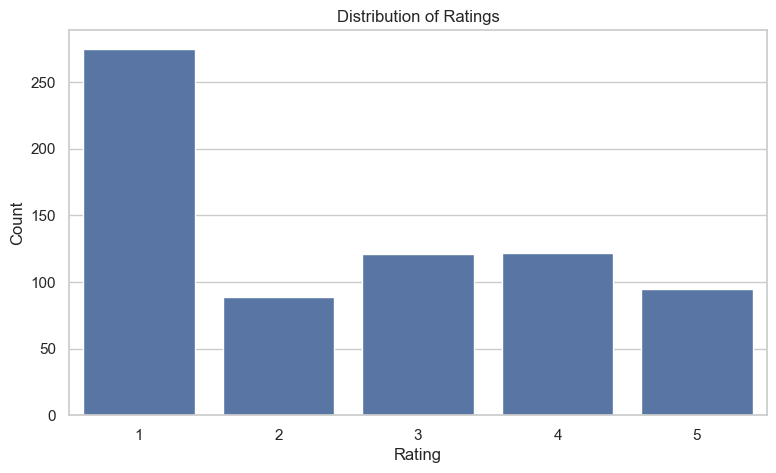

In [5]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9, 5))
sns.countplot(data = df, x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Adding Sentiment Labels in the Data
We will use TextBlob library. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text.
We can use this score to classify each review's sentiment as positive, negative, or neutral.



In [15]:
#pip install textblob

In [6]:
from textblob import TextBlob

In [7]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


In [8]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [10]:
df.sample(5)

,Review,Rating,Sentiment
175,Password is stored on the phone as a plane tex...,1,Negative
12,Simple. Basic. But works perfectly for main fu...,3,Positive
215,Can't change my profile in the app. No setting...,2,Neutral
442,junk,1,Neutral
631,Space key on keyboard not working. Hope this i...,4,Neutral


In [11]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

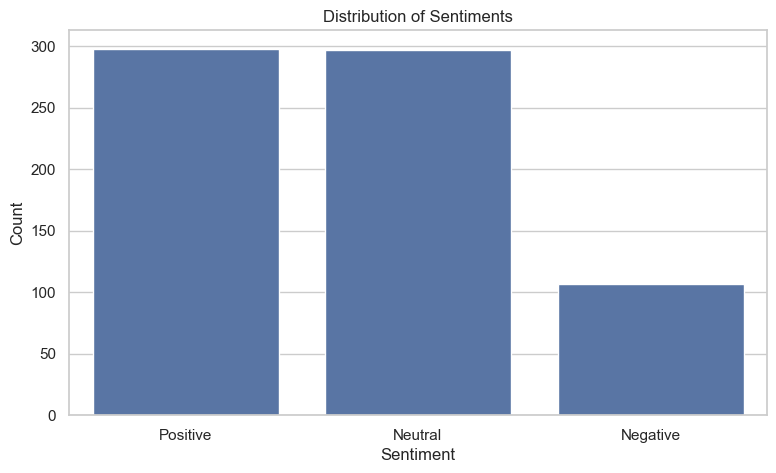

In [12]:
plt.figure(figsize = (9, 5))
sns.barplot(x = sentiment_distribution.index, 
            y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
# So, we can see although the app has low ratings, 
# still the reviewers don't use many negative words in the reviews for the app.
# Next, we'll explore the relationship between the sentiments and the ratings. 
# This analysis can help us understand whether there is a correlation between the 
# sentiment of the text and numerical ratings.

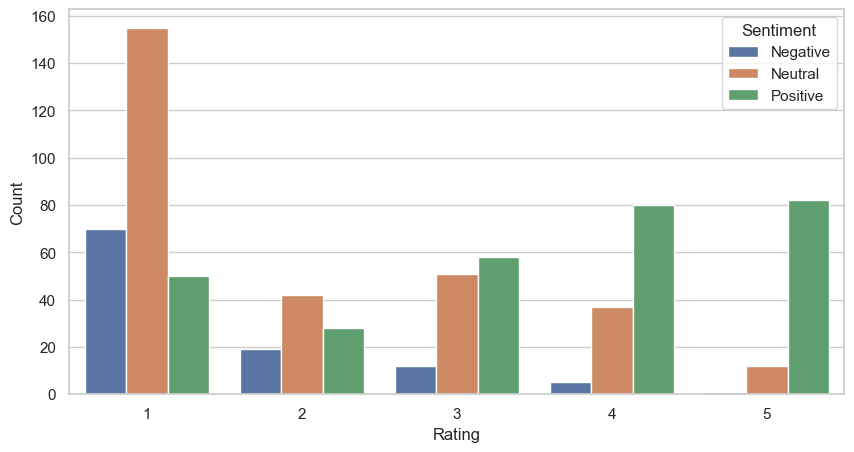

In [14]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()


# summary

# App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates and maintain a positive user community. It involves using data analysis tchniques to determine whether the sentiments in these reviews are positive , negative or neutral.

